In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 


%matplotlib widget
plt.ioff()

def plot_sets(ax,gr=False,ti='',xla=False,yla=False,zla=False,xli=False,yli=False,zli=False,ticks_off=False,xticks_off=False,yticks_off=False,zticks_off=False, ba=False, ar=False,leg=False,view=False):
    
    ax.set_title(ti)
    if gr:  ax.grid(gr);ax.set_axisbelow(True)
    if xla: ax.set_xlabel(xla)
    if yla: ax.set_ylabel(yla)
    if zla: ax.set_zlabel(zla)

    if xticks_off: ax.set_xticklabels([])
    if yticks_off: ax.set_yticklabels([])
    if zticks_off: ax.set_zticklabels([])

    if   ticks_off==1: ax.set_xticklabels([]); ax.set_xticks([]);ax.set_yticklabels([]); ax.set_yticks([])
    elif ticks_off==2: ax.set_xticklabels([]); ax.set_xticks([])
    elif ticks_off==2: ax.set_yticklabels([]); ax.set_yticks([])

    if ba: ax.set_box_aspect(ba)
    if ar: ax.set_aspect(ar)

    if xli: ax.set_xlim(xli)
    if yli: ax.set_ylim(yli)
    if zli: ax.set_zlim(zli)

    if leg: ax.legend(**leg)

    if view:ax.view_init(**view)

SMALL_SIZE  = 8
MEDIUM_SIZE = 10

# title
plt.rc('axes',titlesize=MEDIUM_SIZE,titleweight='bold')
# xy-labells
plt.rc('axes',labelsize=SMALL_SIZE)
# xy-ticks
plt.rc('xtick',labelsize=SMALL_SIZE)
plt.rc('ytick',labelsize=SMALL_SIZE)
    
px2inch = 1/plt.rcParams['figure.dpi']

In [2]:
def rand_mats(D,N):
    X = np.random.rand(D,N)
    W = np.random.randn(D,D)
    B = np.random.randn(D,1)
    return W,B,X

def linear_trans(X,W,B):
    return W@X + B

def soft_max_cols(mat):
    D,_     = mat.shape
    mat     = mat/np.sqrt(D)
    mat_exp = np.exp(mat)
    return mat_exp/np.sum(mat_exp,axis=0)


D = 4   # Embedding length
N = 3   # No words
#############################

_,_,X   = rand_mats(D,N)
Wq,Bq,_ = rand_mats(D,N)
Wk,Bk,_ = rand_mats(D,N)
Wv,Bv,_ = rand_mats(D,N)

Q  = linear_trans(X,Wq,Bq)
K  = linear_trans(X,Wk,Bk)
V  = linear_trans(X,Wv,Bv)
A  = soft_max_cols(K.T@Q)
SA = V @ A

print('X' ,X,X.shape)
print('V' ,V,V.shape)
print('A' ,A,A.shape  )
print('SA',SA,SA.shape)


X [[0.7093777  0.34323263 0.61407113]
 [0.61922823 0.28972664 0.95961004]
 [0.18301031 0.17987522 0.20292358]
 [0.93649424 0.62578221 0.22517102]] (4, 3)
V [[-1.11888755 -0.46617654  0.01871993]
 [ 0.65215857  0.18149207  1.70218707]
 [-1.01170245 -0.98827479 -0.50983039]
 [ 1.02881811  0.79439459  1.03852622]] (4, 3)
A [[0.26315277 0.24950242 0.19222899]
 [0.46006945 0.46016655 0.52555471]
 [0.27677778 0.29033103 0.2822163 ]] (3, 3)
SA [[-0.50373068 -0.48824902 -0.45480083]
 [ 0.72624384  0.74042944  0.70113273]
 [-0.86201707 -0.8552128  -0.85775346]
 [ 0.923654    0.92376282  0.90835551]] (4, 3)


### Scaling SoftMax function

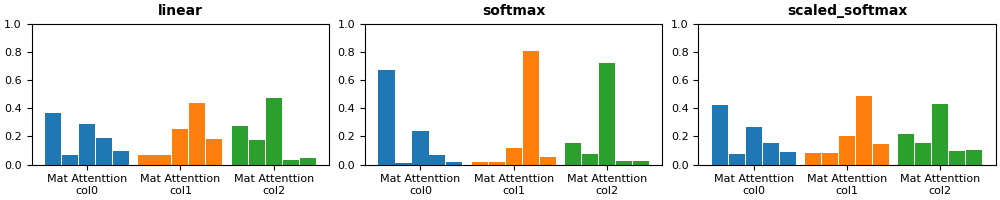

In [3]:
def percent_cols(mat):

    return mat/np.sum(mat,axis=0)

def soft_max_cols(mat,scaling=True):

    D,_     = mat.shape
    if scaling: mat = mat/np.sqrt(D)

    mat_exp = np.exp(mat)
    return mat_exp/np.sum(mat_exp,axis=0)

matt = np.random.rand(5,3)*5
mat0 = percent_cols(matt)
mat1 = soft_max_cols(matt,scaling=False)
mat2 = soft_max_cols(matt,scaling=True )

# print(mat,end='\n\n')
# print(mat0,end='\n\n')
# print(mat1,end='\n\n')
# print(mat2,end='\n\n')


fig, ax     = plt.subplots(1,3,figsize=(1000*px2inch,200*px2inch),constrained_layout=True)
nrows,ncols = matt.shape
bar_x = np.arange(nrows)
bar_w = np.diff(bar_x)[0]

mat_array = [mat0,mat1,mat2]
tit_array = ['linear','softmax','scaled_softmax']
for mat,axi,title in zip(mat_array,ax,tit_array):
    
    x_bar_cen = []
    x_bar_col = []
    for i,col in enumerate(mat.T):
        x_bar = bar_x+(nrows*i)+i*bar_w/2
        axi.bar(x_bar,col.tolist(),width=bar_w*0.95)
        x_bar_cen.append((x_bar[-1]+x_bar[0])/2)
        x_bar_col.append(f'Mat Attenttion\ncol{i}')
    axi.set_xticks(x_bar_cen,x_bar_col)
    axi.set_ylim(0,1)
    axi.set_title(title) 
plt.show()


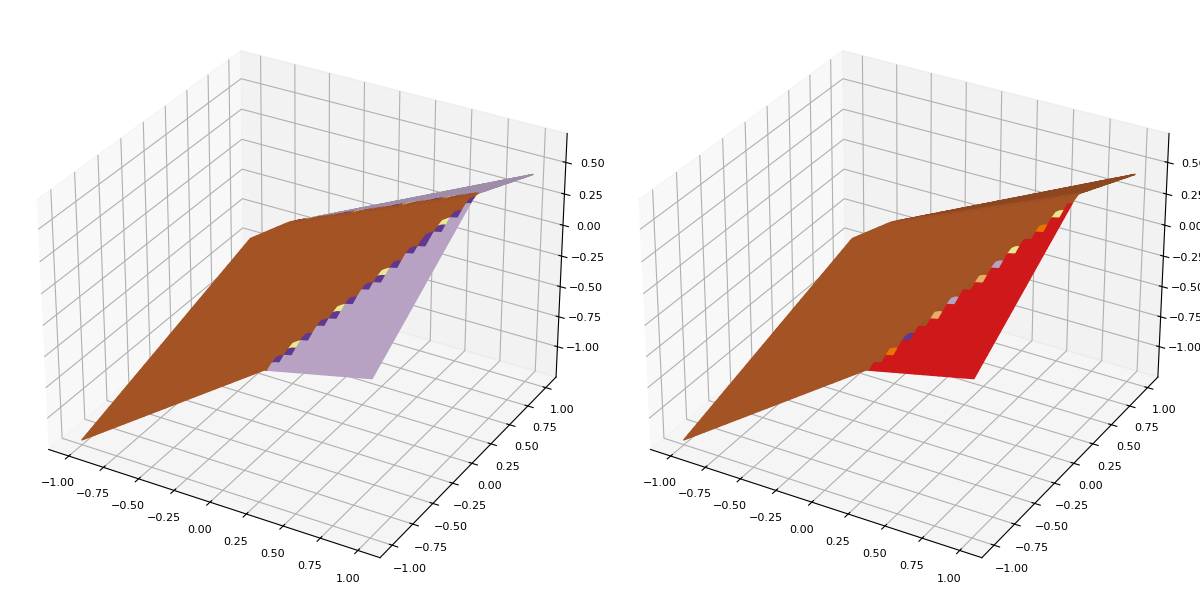

In [4]:
def sigmoid(z): 
    #return 1/(1+np.exp(-z))
    return np.maximum(0,z) 

nX = 80
xmin = -1
xmax = 1
x1 = np.linspace(xmin,xmax,nX)
x2 = np.linspace(xmin,xmax,nX)
X1,X2 = np.meshgrid(x1,x2)

x1_ = X1.reshape(1,-1)
x2_ = X2.reshape(1,-1)
X   = np.vstack((x1_,x2_))

nH = 3
W1 = np.random.randn(nH,2)
W2 = np.random.randn(1,nH)
b1 = np.random.rand(nH,1)
b2 = np.random.rand(1,1)

a1 = sigmoid(W1@X  + b1)
# a2 = sigmoid(W2@a1 + b2)
a2 = W2@a1 +b2

Y  = a2.reshape(X1.shape)

GX, GY  = np.gradient(Y)
G       = np.sqrt(GX**2+GY**2)
G       = G/np.max(G)         # Gradient
A       = np.arctan2(GY,GX)   # Aspect

fig, ax = plt.subplots(1,2,subplot_kw={"projection": "3d"},figsize=(1200*px2inch,600*px2inch),constrained_layout=True)
ax[0].plot_surface(X1,X2,Y,facecolors=plt.cm.Paired(G))
ax[1].plot_surface(X1,X2,Y,facecolors=plt.cm.Paired(A))
#ax.plot_surface(X1,X2,Y)

# fig, ax = plt.subplots(1,1,figsize=(600*px2inch,600*px2inch),constrained_layout=True)
# ax.contour(X1,X2,Y,100)

plt.show()